In [35]:
import numpy as np

from emnist import extract_training_samples
training_images, training_labels = extract_training_samples("balanced")
from emnist import extract_test_samples
testing_images, testing_labels = extract_test_samples("balanced")

training_images = training_images / 255.0
testing_images = testing_images / 255.0
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

import matplotlib.pyplot as plt
class_mapping = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

In [36]:
def class_idx_to_class(class_idx):
    return class_mapping[class_idx]

In [37]:
char_dict = dict.fromkeys(list(class_mapping))
for i in range(training_labels.shape[0]):
    label = class_idx_to_class(training_labels[i])
    image = training_images[i]
    if char_dict[label] is None:
        char_dict[label] = [i]
    else:
        char_dict[label].append(i)

In [40]:
from random import randint

unique_handwriting = dict.fromkeys(list(class_mapping))

# Generates a unique handwriting dictionary from char_dict
def generate_chars():
    unique_handwriting.clear()
    for key in char_dict.keys():
        index = char_dict[key][randint(0, len(char_dict[key])-1)]
        unique_handwriting[key] = index
    return unique_handwriting

# Generates a handwritten sentence given a word input (utilizes unique handwriting)
def generate_image_from_word(input_word):
    handwriting = generate_chars()
    image = np.zeros((28,28,1))
    for char in input_word:
        if char == ' ':
            image = np.concatenate((image,np.zeros((28,28,1))), 1)
        else:
            if char not in "abdefghnqrt":
                char = char.upper()
            image = np.concatenate((image,training_images[handwriting[char]]), 1)
    image = image[0:,28:]
    return image
    

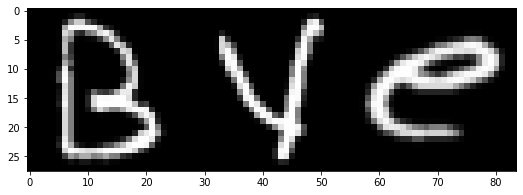

In [45]:
for i in range(5):
    handwritten_image = generate_image_from_word("The quick brown fox jumps over the lazy dog")
    plt.figure(figsize=(28, 3))
    plt.imshow(handwritten_image, cmap='gray')

handwritten_image = generate_image_from_word("Hello")
plt.figure(figsize=(28, 3))
plt.imshow(handwritten_image, cmap='gray')

handwritten_image = generate_image_from_word("Bye")
plt.figure(figsize=(28, 3))
plt.imshow(handwritten_image, cmap='gray')